In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

In [2]:
a=0
b=1

In [27]:
u_ex = lambda x: np.sin(pi*x)

In [4]:
c=3

In [5]:
f = lambda x: -1*(c+pi**2)*np.sin(pi*x)

In [6]:
alpha = 0
beta = 0

In [7]:
numpts = 256

In [8]:
xvec=np.linspace(a,b,numpts+1)

In [9]:
h=xvec[1]-xvec[0]

In [10]:
Amat=(np.identity(numpts-1)*(-2-c*h**2)+np.diag(np.ones(numpts-2),k=1)+np.diag(np.ones(numpts-2),k=-1))/h**2

In [11]:
bvec=np.array([f(xvec[1:-1])]).transpose()

In [12]:
uvec=np.matmul(np.linalg.inv(Amat),bvec)

In [35]:
u_ext=np.array([u_ex(xvec[1:-1])]).transpose()

In [36]:
err=h*np.linalg.norm(uvec-u_ext,ord=2)

In [37]:
err

4.253438264381651e-07

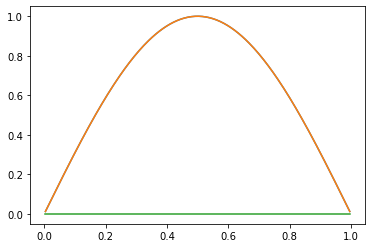

In [38]:
plt.plot(xvec[1:-1],uvec)
plt.plot(xvec[1:-1],u_ext)
plt.plot(xvec[1:-1],uvec-u_ext)

In [94]:
def BVP(a,b,alpha,beta,u,f,numpts):
    xvec=np.linspace(a,b,numpts+1)
    h=xvec[1]-xvec[0]
    Amat=(np.identity(numpts-1)*(-2-c*h**2)+np.diag(np.ones(numpts-2),k=1)+np.diag(np.ones(numpts-2),k=-1))/h**2
    v=np.array([np.append(np.insert(np.zeros(numpts-3),0,alpha),beta)]).transpose()
    bvec=np.array([f(xvec[1:-1])]).transpose()-v
    uvec=np.matmul(np.linalg.inv(Amat),bvec)
    u_ext=np.array([u(xvec[1:-1])]).transpose()
    err=h*np.linalg.norm(uvec-u_ext,ord=2)
    plt.plot(xvec[1:-1],uvec)
    plt.plot(xvec[1:-1],u_ext)
    plt.title(f'error={err:.1E} N={numpts}')
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.savefig(f'hw_6_q_5_N_{numpts}')
    return err

4.253438264381651e-07

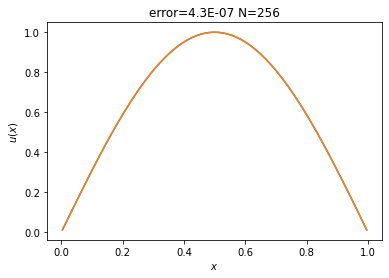

In [99]:
BVP(a,b,alpha,beta,u_ex,f,256)

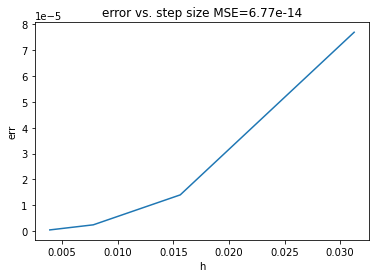

In [113]:
plt.plot([1/32,1/64,1/128,1/256],[7.7e-5,1.4e-5,2.4e-6,4.3e-7])
MSE=np.mean(np.square([7.7e-5,1.4e-5,2.4e-6,4.3e-7]-np.polyval(fit_1,[1/32,1/64,1/128,1/256])))
plt.xlabel('h')
plt.ylabel('err')
plt.title(f'error vs. step size MSE={MSE:.2e}')
plt.savefig('q_6_error_vs_step_size')

In [107]:
fit_1=np.polyfit([1/32,1/64,1/128,1/256],[7.7e-5,1.4e-5,2.4e-6,4.3e-7],2)
np.polyval(fit_1,[1/32,1/64,1/128,1/256])

array([7.69704516e-05, 1.42068387e-05, 1.98632258e-06, 6.66387097e-07])